In [2]:
from autoencoders import *
from pdb_utils import *

In [3]:
import cv2
import matplotlib
import matplotlib.pyplot as plt
%matplot inline

UsageError: Line magic function `%matplot` not found.


In [4]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#structures = parsePdbFiles("PDBs")
#print len(structures)

In [5]:
import pickle
with open('pdb_groups.pkl', 'r') as f:
    pdb_groups = pickle.load(f)

In [7]:
#proteinmatrixdict = ProteinContactMapDict(structures, resize_to=(64,64), removeSymmetry=True)

d1dr9a1.pdb
d1bmld3.pdb


KeyboardInterrupt: 

In [6]:
with open('protein_matrix_dict64.pkl', 'r') as f:
    proteinmatrixdict = pickle.load(f)

In [7]:
labels, features = proteinmatrixdict.keys(), proteinmatrixdict.values()
input_size = len(features[0])
print input_size

2016


In [8]:
new_features, loss = LinearAutoencoder(features, input_size, 500, 100, learning_rate=0.0001)

In [32]:
new_feature_dict = dict(zip(labels,new_features)) # key: pdb name, value: 500D new feature vector

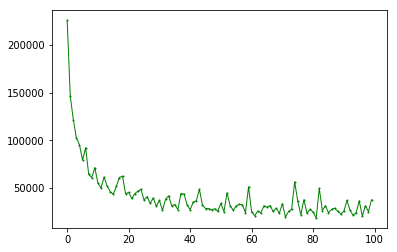

In [9]:
# LOSS GRAPH
fig, ax = plt.subplots()
ax.plot(range(0,len(loss)), loss, 'go-', linewidth=1, markersize=1)

In [13]:
print "number of classes: ", len(set(pdb_groups.keys()))

number of classes:  797


In [38]:
selected_groups = dict(filter(lambda x: len(x[1])>10, pdb_groups.items()))

In [39]:
selected_groups.keys()

['b.1.1.2', 'b.1.1.1', 'b.1.2.1', 'c.2.1.3', 'b.1.1.4']

In [42]:
protein_vectors = []
selected_proteins = []

for group in selected_groups.keys():
    for protein in pdb_groups[group]:
        try:
            protein_vectors.append(new_feature_dict[protein+".pdb"]) # take new features of proteins
            selected_proteins.append(protein)
        except:
            continue

In [43]:
len(selected_proteins)

120

In [44]:
len(protein_vectors[0])

500

In [46]:
# PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
features2d = pca.fit_transform(np.array(protein_vectors))
result_dict = dict(zip(selected_proteins, features2d))

b.1.1.2 ob 15
b.1.1.1 or 69
b.1.2.1 og 12
c.2.1.3 ok 11
b.1.1.4 om 13


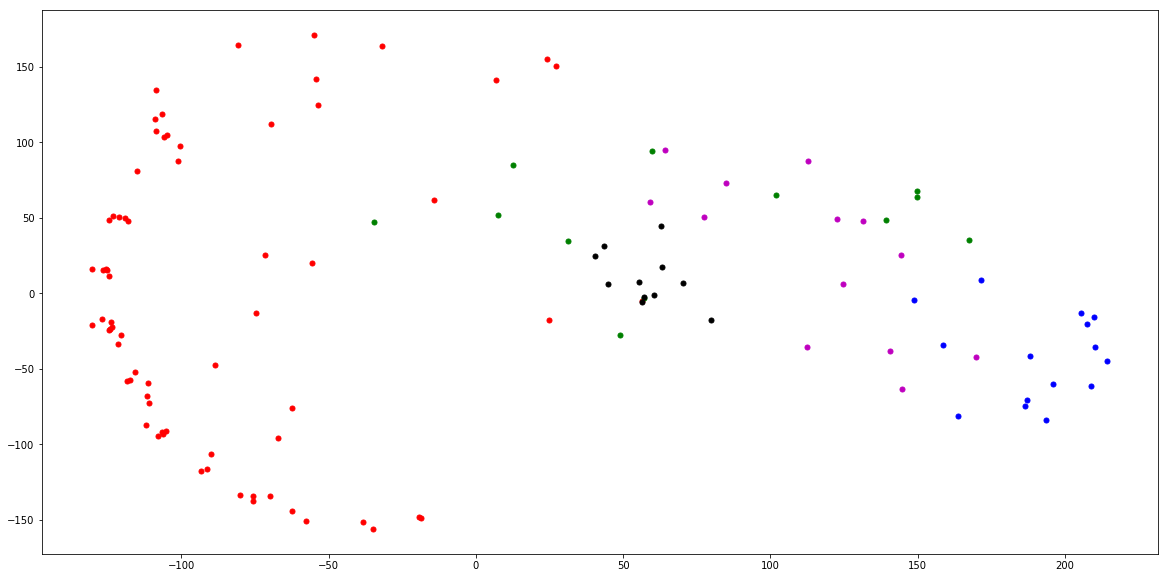

In [59]:
fig, ax = plt.subplots(figsize=(20,10))
colors = ['ob', 'or', 'og', 'ok', "om"]
color_ix = 0

for group, proteins in selected_groups.items():
    color = colors[color_ix]
    c=0
    print group, color,
    for protein in proteins:
        try:
            f2d = result_dict[protein]
            ax.plot(f2d[0], f2d[1], color, markersize=5)
            c+=1
        except:
            continue
    print c
    color_ix+=1

plt.show()